<a href="https://colab.research.google.com/github/SouridyaDey/Credit-Card-Customer-Segmentation-and-Risk-Profiling/blob/master/Credit%20Card%20Customer%20Segmentation%20and%20Cluster%20Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1950,C12013,3666.676179,1.000000,0.00,0.00,0.00,2461.891684,0.000000,0.000000,0.00,0.583333,19,0,4000.0,674.881553,1362.230185,0.000000,12
3041,C13130,688.993252,1.000000,803.57,0.00,803.57,0.000000,1.000000,0.000000,1.00,0.000000,0,53,2000.0,253.769944,195.362332,0.000000,12
4433,C14557,1869.125099,0.545455,158.20,158.20,0.00,1402.159983,0.083333,0.083333,0.00,0.083333,1,1,6500.0,6585.792428,559.387332,0.090909,12
7244,C17439,739.847303,0.909091,329.25,0.00,329.25,1153.945828,0.750000,0.000000,0.75,0.166667,6,13,1000.0,2406.978130,517.270094,0.000000,12
8859,C19100,12.784443,0.625000,94.71,0.00,94.71,0.000000,0.875000,0.000000,0.75,0.000000,0,7,1500.0,144.041664,78.033738,0.000000,8
703,C10730,3386.992510,1.000000,171.92,171.92,0.00,0.000000,0.416667,0.416667,0.00,0.000000,0,5,4500.0,907.867126,912.269822,0.000000,12
3456,C13553,58.924277,1.000000,449.40,0.00,449.40,0.000000,1.000000,0.000000,1.00,0.000000,0,12,2000.0,420.654043,176.280895,0.545455,12
63,C10065,7.152356,0.090909,840.00,840.00,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0,1,1600.0,0.000000,NaN,0.000000,12
4097,C14213,2446.709596,1.000000,0.00,0.00,0.00,5281.049743,0.000000,0.000000,0.00,0.250000,6,0,5000.0,5695.396335,696.156899,0.000000,12
235,C10244,4014.388265,1.000000,1189.52,1189.52,0.00,0.000000,1.000000,1.000000,0.00,0.000000,0,12,8000.0,0.000000,NaN,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.duplicated().any()

np.False_

In [7]:
# Drop Customer ID (not useful for clustering)
df = df.drop("CUST_ID", axis=1)

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

# Restore with original column names
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [10]:
# Restore original column names
df = pd.DataFrame(df_imputed)

In [11]:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


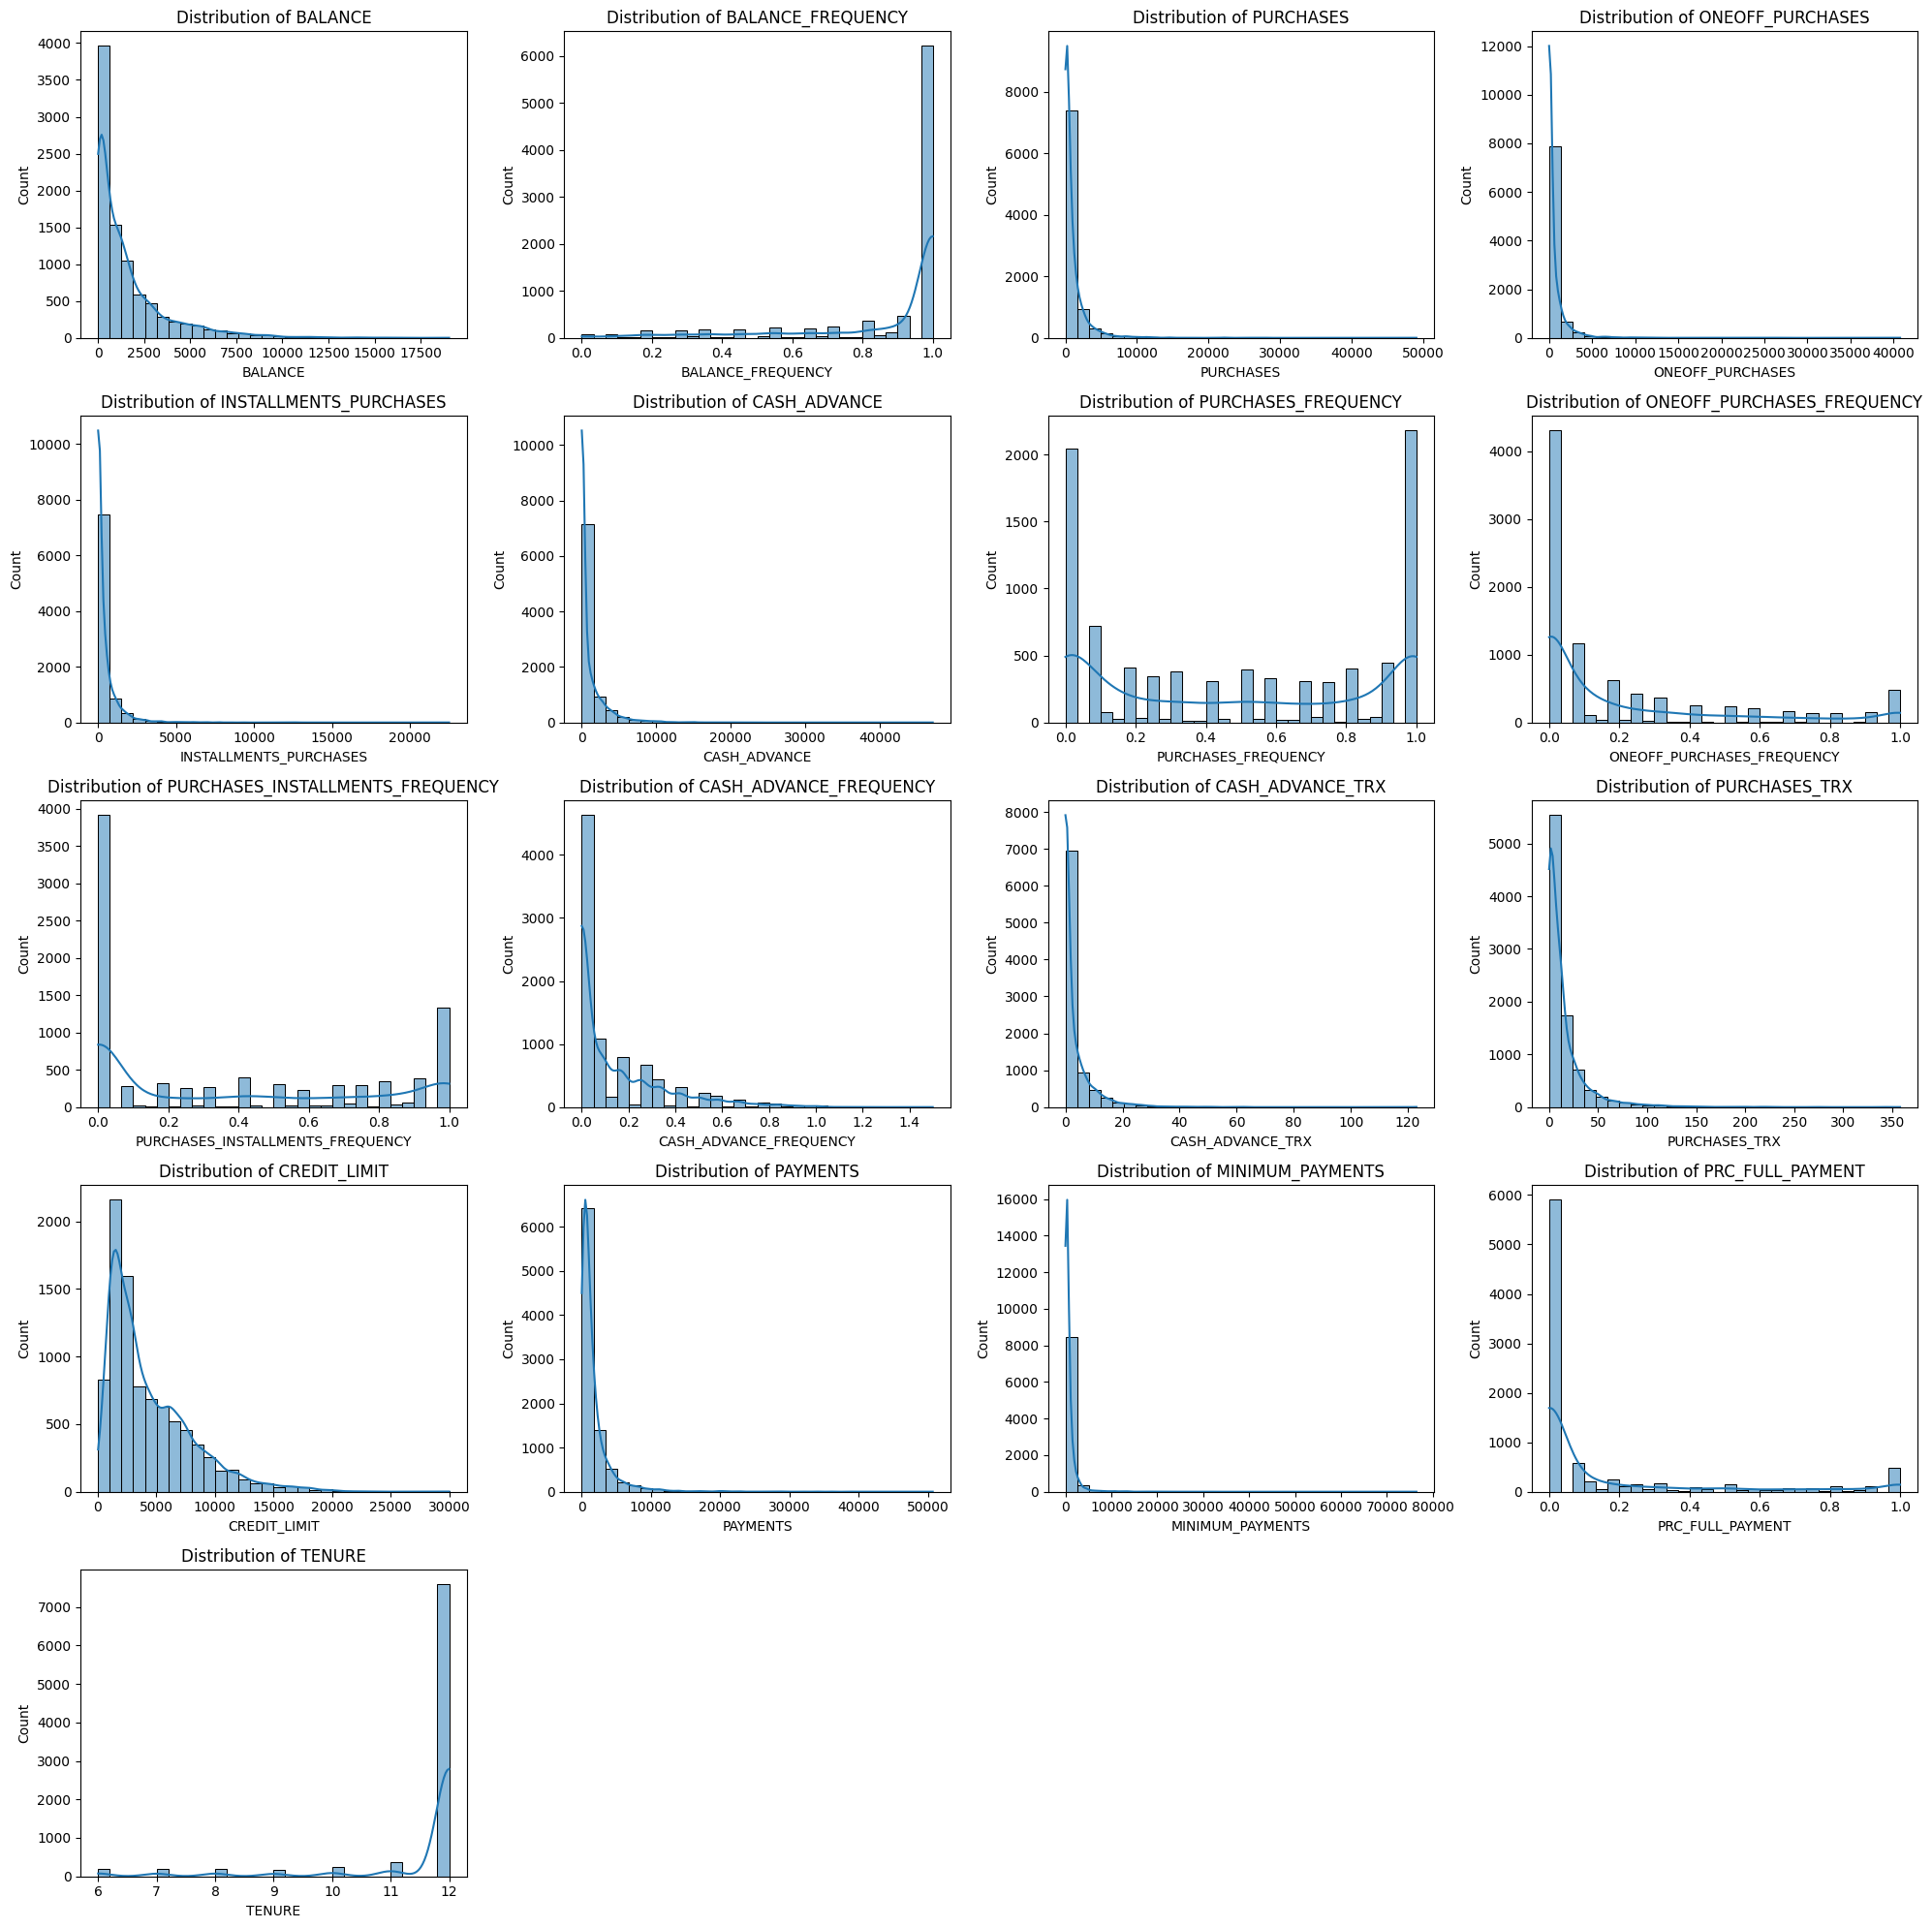

In [12]:
n_cols = 4
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(20, n_rows*4))

for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

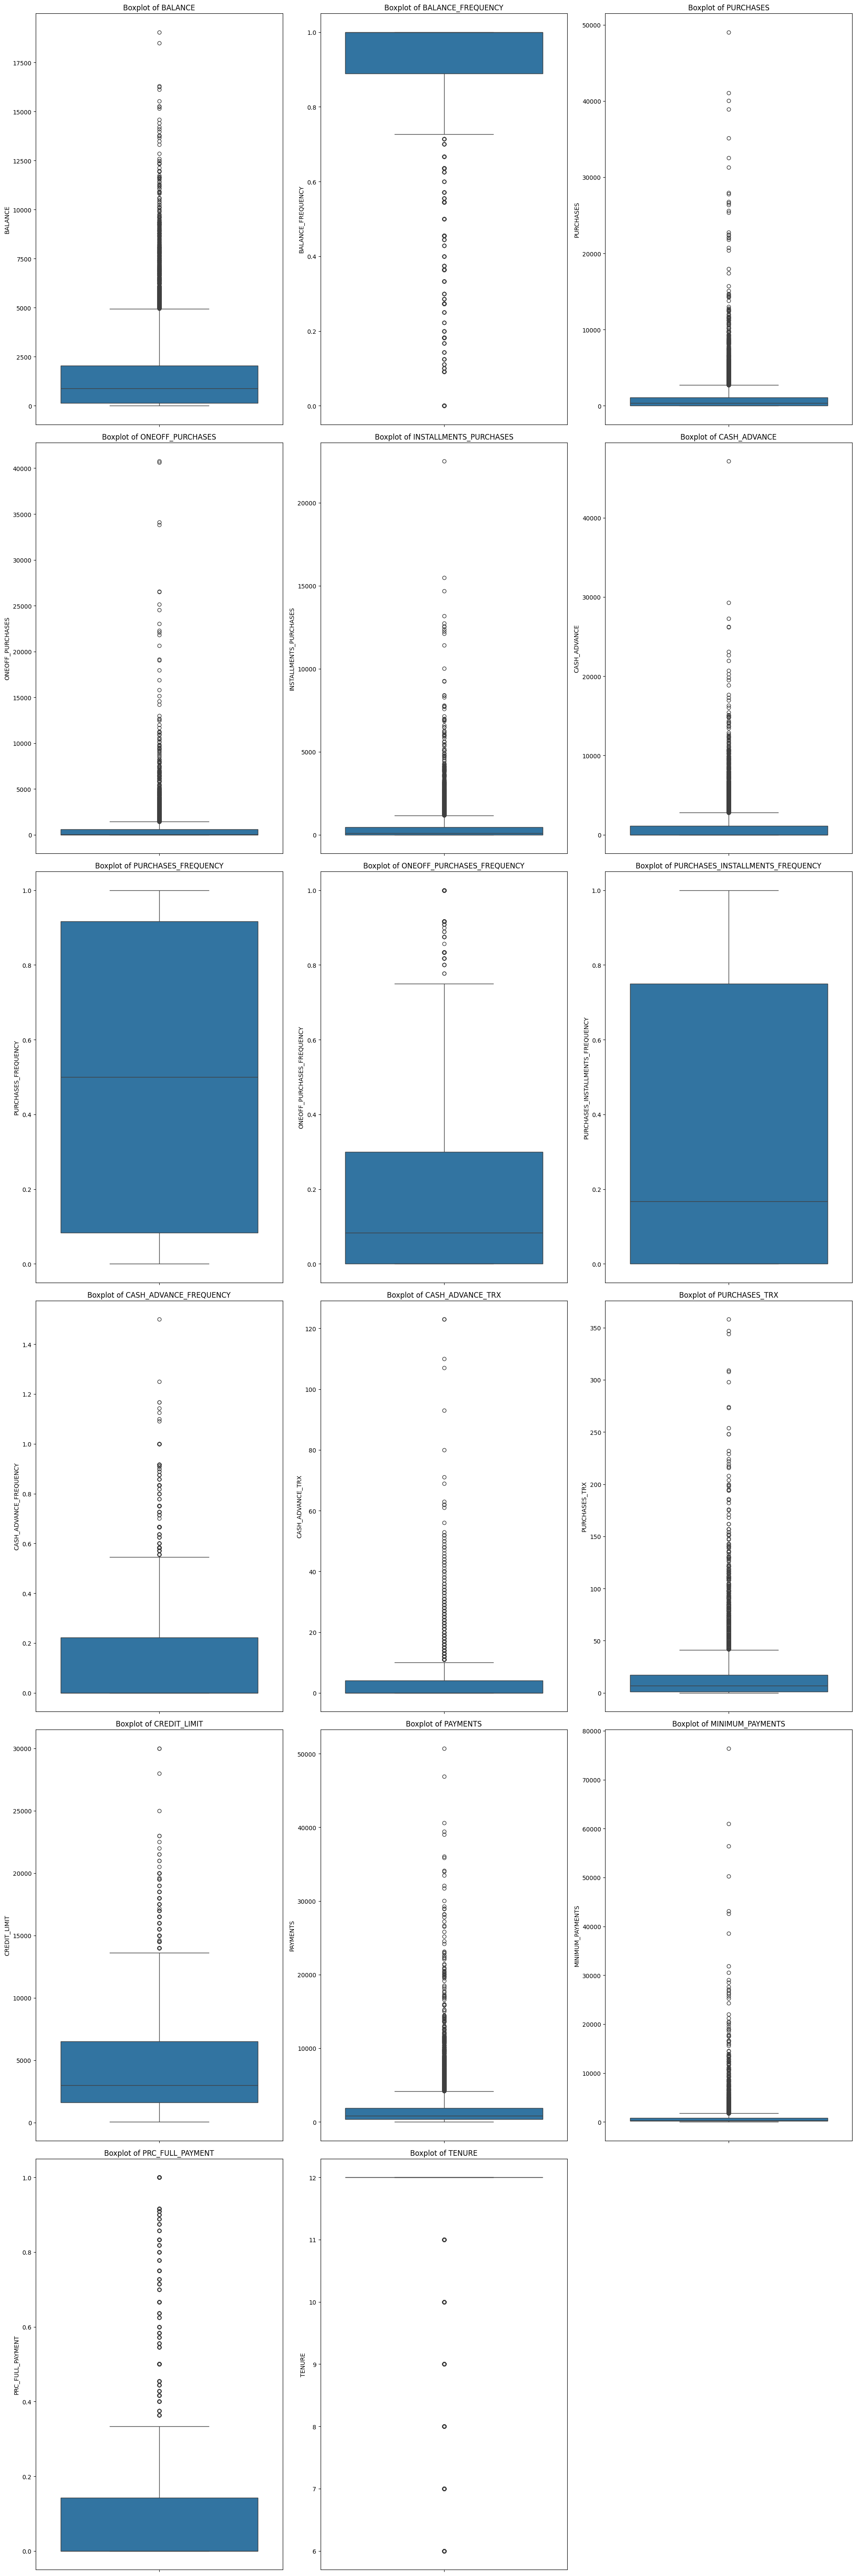

In [13]:
plt.figure(figsize=(20, 60))

for i, col in enumerate(df.columns, 1):
    plt.subplot(len(df.columns)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}", fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
outlier_summary = {}

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df.sort_values(by='Outlier_Count', ascending=False)

,Outlier_Count
BALANCE_FREQUENCY,1493
PRC_FULL_PAYMENT,1474
TENURE,1366
CASH_ADVANCE,1030
ONEOFF_PURCHASES,1013
MINIMUM_PAYMENTS,889
INSTALLMENTS_PURCHASES,867
PAYMENTS,808
PURCHASES,808
CASH_ADVANCE_TRX,804


In [15]:
# List of features to log-transform
log_features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT',
    'PURCHASES_TRX', 'CASH_ADVANCE_TRX'
]

# Apply log(1+x) transform
df_imputed[log_features] = df_imputed[log_features].apply(lambda x: np.log1p(x))

In [16]:
# Now scale all features before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [17]:
pca_full = PCA(n_components=0.95, random_state = 42)  # keeping 95% variance
df_pca_full = pca_full.fit_transform(df_scaled)

# For visualization
pca_vis = PCA(n_components=2)
df_pca_vis = pca_vis.fit_transform(df_scaled)

In [18]:
# original feature names before scaling
original_cols = [
'BALANCE','BALANCE_FREQUENCY','PURCHASES',	'ONEOFF_PURCHASES',	'INSTALLMENTS_PURCHASES',
'CASH_ADVANCE',	'PURCHASES_FREQUENCY',	'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
'CASH_ADVANCE_FREQUENCY',	'CASH_ADVANCE_TRX','PURCHASES_TRX',	'CREDIT_LIMIT','PAYMENTS',
'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 'TENURE'
]

# Creating loadings DataFrame
loadings = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(pca_full.n_components_)],
    index=original_cols
)

# Feature importance = sum of absolute loadings
feature_importance = loadings.abs().sum(axis=1)

# Top 10 features
top_features = feature_importance.sort_values(ascending=False).head(10)

print("Top 10 contributing features:")
print(top_features)

Top 10 contributing features:
CREDIT_LIMIT                  2.634842
BALANCE_FREQUENCY             2.558793
PRC_FULL_PAYMENT              2.482617
TENURE                        2.354399
ONEOFF_PURCHASES_FREQUENCY    2.306921
PAYMENTS                      2.274780
MINIMUM_PAYMENTS              2.088623
ONEOFF_PURCHASES              1.944661
CASH_ADVANCE_FREQUENCY        1.734830
PURCHASES                     1.719957
dtype: float64


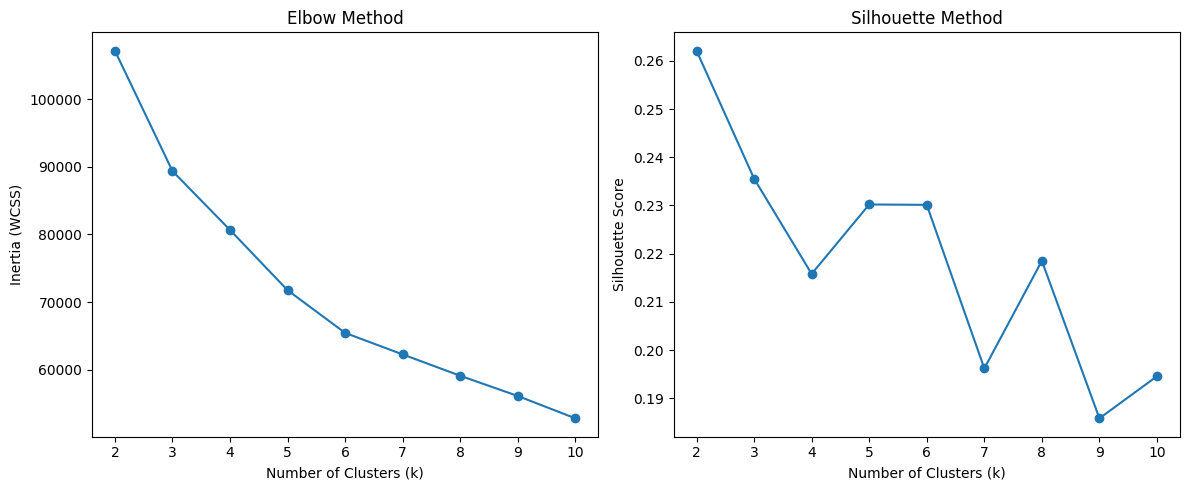

Best number of clusters (k): 2


In [19]:
# Range of clusters to try
K = range(2, 11)

inertias = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca_full)  # using PCA reduced data
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca_full, labels))

# Plot Elbow (Inertia)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(K), inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(list(K), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")

plt.tight_layout()
plt.show()

# Best k by silhouette
best_k = list(K)[np.argmax(silhouette_scores)]
print("Best number of clusters (k):", best_k)

### Selecting number of clusters as 3 instead of 2 so that we can differentiate amongst 3 clusters rather than 2


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca_full)
df["Cluster"] = clusters

In [21]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
359,1543.287931,1.000000,0.00,0.00,0.00,36.481832,0.000000,0.000000,0.000000,0.083333,1.0,0.0,1800.0,548.589391,529.340488,0.000000,12.0,2
6874,368.687038,0.818182,0.00,0.00,0.00,1587.748905,0.000000,0.000000,0.000000,0.083333,1.0,0.0,2000.0,2115.925455,217.791398,0.000000,12.0,2
6323,533.512148,1.000000,2243.99,1543.99,700.00,949.859862,1.000000,0.583333,0.916667,0.083333,1.0,30.0,7000.0,2522.034983,269.921984,0.333333,12.0,0
830,4115.739163,1.000000,0.00,0.00,0.00,540.251858,0.000000,0.000000,0.000000,0.250000,3.0,0.0,8500.0,1006.261579,1313.531481,0.000000,12.0,2
3133,240.814517,0.181818,59.00,59.00,0.00,196.906234,0.083333,0.083333,0.000000,0.083333,1.0,2.0,5000.0,5135.531491,288.495064,0.000000,12.0,2
5126,1273.731635,1.000000,0.00,0.00,0.00,534.228453,0.000000,0.000000,0.000000,0.166667,3.0,0.0,1500.0,755.520686,568.672226,0.000000,12.0,2
2163,1003.704494,0.818182,50.00,50.00,0.00,457.650652,0.083333,0.083333,0.000000,0.250000,5.0,1.0,3500.0,3389.035460,260.167070,0.000000,12.0,2
7192,1640.837102,1.000000,0.00,0.00,0.00,708.972588,0.000000,0.000000,0.000000,0.500000,12.0,0.0,1900.0,493.854051,547.149327,0.000000,12.0,2
8511,6.646795,1.000000,228.84,0.00,228.84,0.000000,0.666667,0.000000,0.666667,0.000000,0.0,12.0,4000.0,232.790324,96.602631,1.000000,12.0,1
4575,290.246277,1.000000,2617.61,1342.69,1274.92,0.000000,1.000000,1.000000,0.750000,0.000000,0.0,52.0,2500.0,2948.963493,164.864181,0.916667,12.0,0


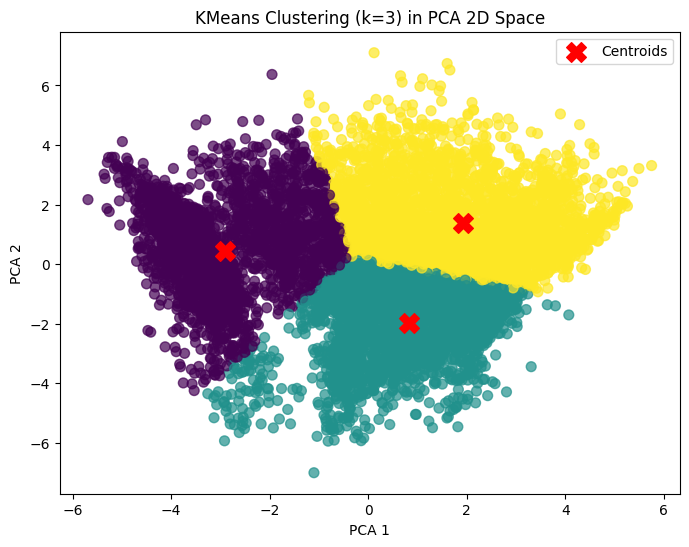

In [22]:
# KMeans on 2D PCA for visualization
kmeans_vis = KMeans(n_clusters=3, random_state=42)
labels_vis = kmeans_vis.fit_predict(df_pca_vis)

# Plot PCA 2D projection
plt.figure(figsize=(8,6))
plt.scatter(df_pca_vis[:, 0], df_pca_vis[:, 1], c=labels_vis, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centers (in 2D PCA space)
centers_vis = kmeans_vis.cluster_centers_
plt.scatter(centers_vis[:, 0], centers_vis[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (k=3) in PCA 2D Space")
plt.legend()
plt.show()

In [23]:
# Creating new feature Credit Utilization Ratio
df['CREDIT_UTILIZATION'] = df['BALANCE'] / df['CREDIT_LIMIT']

In [24]:
# Creating cluster summary with business features
cluster_profile = df.groupby('Cluster').agg({
    'CREDIT_UTILIZATION': 'mean',
    'PRC_FULL_PAYMENT': 'mean',
    'BALANCE': 'mean',
    'CASH_ADVANCE': 'mean',
    'PURCHASES': 'mean',
    'PAYMENTS': 'mean',
    'MINIMUM_PAYMENTS': 'mean'
}).reset_index()

In [25]:
# Creating labels for labelling different users
def label_cluster(row):
    # Revolvers: high utilization, low repayment
    if row['CREDIT_UTILIZATION'] > cluster_profile['CREDIT_UTILIZATION'].mean() and row['PRC_FULL_PAYMENT'] < cluster_profile['PRC_FULL_PAYMENT'].mean():
        return "Revolvers / High-risk customers"
    # Transactors: low utilization, high repayment
    elif row['PRC_FULL_PAYMENT'] > cluster_profile['PRC_FULL_PAYMENT'].mean() and row['CREDIT_UTILIZATION'] < cluster_profile['CREDIT_UTILIZATION'].mean():
        return "Transactors / Low-risk customers"
    # Everyone else
    else:
        return "Moderate-risk customers"

In [26]:
# Applying the labels
cluster_profile['Cluster_Label'] = cluster_profile.apply(label_cluster, axis=1)

In [27]:
# Mapping back to original df
label_dict = dict(zip(cluster_profile['Cluster'], cluster_profile['Cluster_Label']))
df['Cluster_Label'] = df['Cluster'].map(label_dict)

In [28]:
# Final Profile Summary
print("\nCluster Profiles with Labels:\n")
print(cluster_profile)


Cluster Profiles with Labels:

   Cluster  CREDIT_UTILIZATION  PRC_FULL_PAYMENT      BALANCE  CASH_ADVANCE  \
0        0            0.437037          0.159306  2051.949266    768.293126   
1        1            0.125704          0.268747   222.980553     33.610010   
2        2            0.599060          0.032274  2367.096220   2159.564001   

     PURCHASES     PAYMENTS  MINIMUM_PAYMENTS  \
0  2297.833815  2633.258618       1206.549018   
1   466.646498   703.859091        212.511045   
2   103.369725  1764.890357       1101.201115   

                      Cluster_Label  
0           Moderate-risk customers  
1  Transactors / Low-risk customers  
2   Revolvers / High-risk customers  


In [29]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,CREDIT_UTILIZATION,Cluster_Label
2092,4811.886042,1.000000,4911.41,4005.81,905.60,10629.807560,0.750000,0.750000,0.250000,0.416667,14.0,63.0,6000.0,10079.387410,2045.063933,0.111111,12.0,0,0.801981,Moderate-risk customers
383,1.838084,0.272727,16.50,16.50,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,6000.0,57.595083,67.192500,0.000000,12.0,1,0.000306,Transactors / Low-risk customers
7311,209.026944,1.000000,1520.76,657.19,863.57,0.000000,0.916667,0.250000,0.916667,0.000000,0.0,24.0,3500.0,1771.078066,192.557306,0.166667,12.0,0,0.059722,Moderate-risk customers
5676,152.255187,0.833333,894.28,894.28,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0.0,5.0,4000.0,304.061592,84.043137,0.000000,6.0,1,0.038064,Transactors / Low-risk customers
5906,50.044687,0.555556,658.96,658.96,0.00,0.000000,0.222222,0.222222,0.000000,0.000000,0.0,2.0,2500.0,207.721495,14.078212,0.000000,9.0,1,0.020018,Transactors / Low-risk customers
3382,877.354533,1.000000,6954.28,6441.40,512.88,61.792952,1.000000,1.000000,1.000000,0.083333,1.0,105.0,9000.0,7486.398825,236.319631,0.166667,12.0,0,0.097484,Moderate-risk customers
4825,633.388444,1.000000,830.45,830.45,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0.0,8.0,6000.0,497.263402,239.606651,0.000000,12.0,0,0.105565,Moderate-risk customers
503,839.897907,1.000000,1869.88,815.11,1054.77,0.000000,1.000000,0.363636,0.909091,0.000000,0.0,30.0,4000.0,999.235386,280.393252,0.000000,11.0,0,0.209974,Moderate-risk customers
5024,49.198038,0.272727,699.00,699.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1800.0,69.941439,166.648868,0.000000,12.0,1,0.027332,Transactors / Low-risk customers
7673,0.000000,0.000000,30.98,0.00,30.98,0.000000,0.166667,0.000000,0.166667,0.000000,0.0,2.0,4000.0,63.582004,14.458210,0.090909,12.0,1,0.000000,Transactors / Low-risk customers


In [30]:
import numpy
import pandas
import seaborn
import matplotlib
import sklearn
import flask

print("numpy==", numpy.__version__)
print("pandas==", pandas.__version__)
print("seaborn==", seaborn.__version__)
print("matplotlib==", matplotlib.__version__)
print("scikit-learn==", sklearn.__version__)
print("flask==", flask.__version__)

numpy== 2.0.2
pandas== 2.2.2
seaborn== 0.13.2
matplotlib== 3.10.0
scikit-learn== 1.6.1
flask== 3.1.1


/tmp/ipython-input-1663868611.py:13: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.2. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("flask==", flask.__version__)


In [31]:
import os
import pickle

# Create directory if it doesn't exist
os.makedirs("models", exist_ok=True)

pickle.dump(imputer, open("models/knn_imputer.pkl", "wb"))
pickle.dump(scaler, open("models/scaler.pkl", "wb"))
pickle.dump(pca_full, open("models/pca.pkl", "wb"))
pickle.dump(kmeans, open("models/kmeans.pkl", "wb"))